# Trouble Shooting
## Build Issues
### error: debug information for auto is not yet supported
Clang 3.5 cannot compile modern C++ code with debug symbols activated (option `-g`).  Be sure to specify some `CXXFLAGS` to `configure`, for instance:

    ./configure CXXFLAGS=-O2

### Warnings: argument unused

This warning is due to the use of ccache: it calls the compiler with options that have become useless, and clang complains about them:


      CXX      lib/vcsn/algos/lib_libvcsn_la-are-isomorphic.lo
    clang: warning: argument unused during compilation: '-I ../..'
    clang: warning: argument unused during compilation: '-I .'
    clang: warning: argument unused during compilation: '-isystem /opt/local/include'

To get rid of these warnings, use pass ''-Qunused-arguments'' to your compiler.  For instance:

    ./configure CXX='ccache clang++' CXXFLAGS='-Qunused-arguments'

### UnicodeDecodeError: 'ascii' codec can't decode byte

This error is triggered if your locale is not set to a UTF8 locale: python tries to read UTF8 files as ASCII.

        GEN      vcsn/dyn/algos.json.stamp
    Traceback (most recent call last):
      File "./build-aux/bin/dyn-json", line 144, in <module>
        process_header(args.input, args.output)
      File "./build-aux/bin/dyn-json", line 128, in process_header
        for m in function_re.finditer(f.read()):
      File
    "/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/encodings/ascii.py",
    line 26, in decode
        return codecs.ascii_decode(input, self.errors)[0]
    UnicodeDecodeError: 'ascii' codec can't decode byte 0xc4 in position 1147:
    ordinal not in range(128)
    make: *** [vcsn/dyn/algos.json.stamp] Error 1

To fix it, change your locale to something that enables UTF8. For instance :

    export LC_ALL=en_US.UTF-8
    export LANG=en_US.UTF-8
    
### configure: error: cannot find the flags to link with Boost python

Your boost_python3 library is probably linked with Python 2 by error. To check it, try compiling this:

    #include <boost/python.hpp>
    BOOST_PYTHON_MODULE(empty) {}
    int main ()
    {
      return 0;
    }

with `g++ -I/usr/include/python3.5m/ conftest.cc -lboost_python-py35 -lpython3.5m` (adjusting for your library names)

If you get this set of error, your boost_python library is broken.

    /tmp/cc6JvhrE.o: In function `PyInit_empty': 
    conftest.cc:(.text+0x8a): undefined reference to `boost::python::detail::init_module(PyModuleDef&, void (*)())' 
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_Size'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyUnicodeUCS4_FromEncodedObject'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyFile_FromString'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_Type'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyInt_Type'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_FromString'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyUnicodeUCS4_AsWideChar'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_FromStringAndSize'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `Py_InitModule4_64'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_FromFormat'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyNumber_Divide'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyNumber_InPlaceDivide'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyInt_AsLong'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_InternFromString'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyClass_Type'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyString_AsString'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyInt_FromLong'
    /usr/lib/gcc/x86_64-linux-gnu/6/../../../x86_64-linux-gnu/libboost_python-py35.so: undefined reference to `PyFile_AsFile'
    collect2: error: ld returned 1 exit status


    
## Runtime Issues
### value is not starrable: 1
In a way or another, you asked for the computation of $1^*$ in a semiring that does not support it.  For instance the rational expression ${a^*}^*$ is invalid in $\mathbb{Q}$:

In [1]:
import vcsn
try:
    vcsn.Q.expression('a**').automaton()
except RuntimeError as err:
    import sys
    print("RuntimeError:", err, file=sys.stderr)

RuntimeError: Q: value is not starrable: 1
  while computing expansion of: a**
  while computing derived-term of: a**


This computation is valid in $\mathbb{B}$:

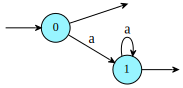

In [2]:
vcsn.B.expression('a**').automaton()